# Aprendizaje Automático

**Descripción de los datos:** El csv contiene datos de 5000 clientes. Los datos incluyen información demográfica del cliente (edad, ingresos, etc.), la relación del cliente con el banco (hipoteca, cuenta de valores, etc.) y la respuesta del cliente a la última campaña de préstamo personal (Préstamo personal). Entre estos 5000 clientes, solo 480 (= 9.6%) aceptaron el préstamo personal que se les ofreció en la campaña anterior.

**Dominio:** Banca

**Contexto:** Este caso es sobre un banco (Thera Bank) cuya administración desea explorar formas de convertir a sus clientes de responsabilidad en clientes de préstamos personales (mientras los retiene como depositantes). Una campaña que el banco realizó el año pasado para clientes de responsabilidad mostró una tasa de conversión saludable de más del 9% de éxito. Esto ha alentado al departamento de marketing minorista a diseñar campañas con un mejor objetivo de marketing para aumentar la proporción de éxito con un presupuesto mínimo.

**Información de las variables**

+ **ID**: ID del cliente
+ **Age:** edad del cliente en años completos
+ **Experience:**  años de experiencia profesional
+ **Income:** Ingresos anuales del cliente (miles de dólares)
+ **ZIP code :** Dirección postal Código postal.
+ **Family:** tamaño de la familia del cliente
+ **CCAvg:** Prom. gasto en tarjetas de crédito por mes (miles de dólares)
+ **Education:** nivel educativo. 1: Pregrado; 2: graduado; 3: avanzado / profesional
+ **Mortgage:** Valor de la hipoteca de la casa, si corresponde. (Miles de dólares)
+ **Personal Loan:** ¿este cliente aceptó el préstamo personal ofrecido en la última campaña?
+ **Securities Account:** ¿Tiene el cliente una cuenta de valores con el banco?
+ **CD Account:** ¿Tiene el cliente una cuenta de certificado de depósito (CD) con el banco?
+ **Online:** ¿Utiliza el cliente servicios de banca por Internet?
+ **Credit card:** ¿El cliente usa una tarjeta de crédito emitida por un banco?

Los resultados del aprendizaje


+ Análisis exploratorio de datos
+ Preparando los datos para entrenar un modelo
+ Entrenando y haciendo predicciones usando un modelo de clasificación
+ Evaluación modelo

In [1]:
# Importar packages 
 #Pandas, Numpy, Seaborn, Scipy
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, sys
import matplotlib.style as style; style.use('fivethirtyeight')
from scipy.stats import zscore, norm

# Modelamiento - LR, KNN, NB, Metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Oversampling
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

# warnings
import warnings; warnings.filterwarnings('ignore')
pd.options.display.max_rows = 4000

In [2]:
bank=pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
bank.shape

(5000, 14)

**observaciones:** 5000 observaciones y 14 columnas, no existen valores misiing

# Data Analysis

In [6]:
bank.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500,1443.520,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338,11.463,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.105,11.468,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774,46.034,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503,2121.852,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396,1.148,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.938,1.748,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881,0.840,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.499,101.714,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096,0.295,0.0,0.00,0.0,0.00,1.0


**Tipos de variables:**
+ **ID:** Categorica 
+ **Age:** númerica discreta: La edad mínima en el conjunto de datos es 23 y la máxima 67.
+ **Experiene:** númerica continua. La experiencia mínima en el conjunto de datos es -3 (que parece ser un error cometido durante la grabación, estos valores seran reemplazados) y la experiencia máxima es 43.
+ **Income:** númerica continua. El ingreso mínimo en el conjunto de datos es de 8,000 dólares, mientras que el ingreso máximo es de 224,000 dólares.
+ **ZIP:** Categorica
+ **Family:** Categorica. El tamaño de familia más bajo es 1 y el máximo es 4
+ **CCAVG:** Numerica. El gasto promedio mínimo en tarjetas de crédito por mes es de cero dólares y el máximo es de 10,000 dólares.
+ **Education:** Categorica. 1: Undergrad; 2: Graduate; 3: Advanced/Professional.
+ **Mortgage}:** Númerica continua. El valor mínimo de la hipoteca en el conjunto de datos es cero dólares, lo que significa que no hubo hipoteca de la casa, y el valor máximo es de 635,000 dólares.
+ **Personal loan:** Dicotomica. Si el cliente aceptó el préstamo personal ofrecido en la última campaña, es 1, sino 0.
+ **S.Account:** Dicotomica. Si el cliente tiene una cuenta de valores con el banco, es 1, sino 0.
+ **CD Account:** Dicotomica. Si el cliente tiene una cuenta de certificado de depósito (CD) con el banco,es 1, sino 0.
+ **Online:** Dicotomica. Si el cliente utiliza servicios de banca por Internet, es 1, sino 0.
+ **CreditCard:** Dicotomica. Si el cliente usa una tarjeta de crédito emitida por UniversalBank, es 1, sino 0.

In [7]:
# Variable respuesta
display(bank['Personal Loan'].value_counts(), bank['Personal Loan'].value_counts(normalize = True)*100)

0    4520
1     480
Name: Personal Loan, dtype: int64

0    90.4
1     9.6
Name: Personal Loan, dtype: float64

In [8]:
# valores negativos en Experience
bank.loc[bank['Experience'] < 0].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,52.0,2427.346154,1478.834118,90.0,767.25,2783.5,3669.500,4958.0
Age,52.0,24.519231,1.475159,23.0,24.00,24.0,25.000,29.0
Experience,52.0,-1.442308,0.639039,-3.0,-2.00,-1.0,-1.000,-1.0
Income,52.0,69.942308,37.955295,12.0,40.75,65.5,86.750,150.0
ZIP Code,52.0,93240.961538,1611.654806,90065.0,92167.75,93060.0,94720.000,95842.0
Family,52.0,2.865385,0.970725,1.0,2.00,3.0,4.000,4.0
CCAvg,52.0,2.129423,1.750562,0.2,1.00,1.8,2.325,7.2
Education,52.0,2.076923,0.836570,1.0,1.00,2.0,3.000,3.0
Mortgage,52.0,43.596154,90.027068,0.0,0.00,0.0,0.000,314.0
Personal Loan,52.0,0.000000,0.000000,0.0,0.00,0.0,0.000,0.0


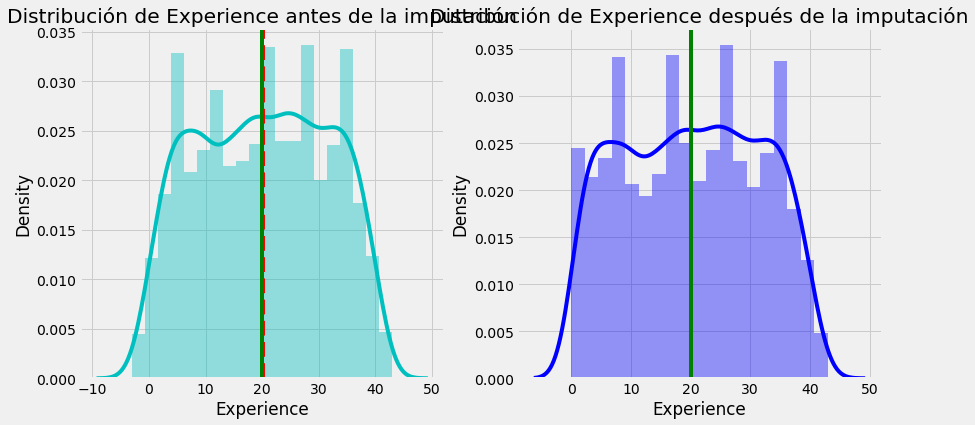

In [9]:
# distribución de Experience antes y después de la imputación
fig = plt.figure(figsize=(12.8, 6))

ax = fig.add_subplot(121)

sns.distplot(bank['Experience'], color = 'c', ax = ax).set_title('Distribución de Experience antes de la imputación')
ax.axvline(bank['Experience'].mean(), color = 'r', linestyle = '--', label = 'Mean')
ax.axvline(bank['Experience'].median(), color = 'g', linestyle = '-', label = 'Median')

replace_value = bank.loc[(bank['Age'] > 23) & (bank['Age'] <= 29) & (bank['Income'] > 12) & (bank['Income'] < 150) & 
         (bank['Personal Loan'] == 0) & (bank['CD Account'] == 0), 'Experience'].median()

# Reemplazamos los valores negativos por un 2
bank['Experience'] = np.where(bank['Experience'] < 0, replace_value, bank['Experience'])

ax = fig.add_subplot(122)
sns.distplot(bank['Experience'], color = 'b', ax = ax).set_title('Distribución de Experience después de la imputación')
ax.axvline(bank['Experience'].mean(), color = 'r', linestyle = '--', label = 'Mean')
ax.axvline(bank['Experience'].median(), color = 'g', linestyle = '-', label = 'Median')

In [10]:
bank['Experience'].describe()
# Ya no hay valores negativos

count    5000.000000
mean       20.140400
std        11.405644
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

**Observación:** Tratar con experiencias negativas

La observación en la que la experiencia es marcada como negativa en el conjunto de datos es para personas con un rango de edad de 23-29 con una mediana y una media cercana a 24. Este grupo de personas que tienen una experiencia marcada negativa en el conjunto de datos tienen ingresos que oscilan entre 12 y 150, no tomó el préstamo personal que se les ofreció en la campaña anterior y, además, tienen una cuenta de certificado de depósito con el banco. Usó estos hallazgos para imputar los valores negativos en la experiencia. Hay un cambio leve pero insignificante en el valor de la media de 20.1046 a 20.1404, mientras que el valor medio no se ve afectado.

Text(0.5, 1.0, 'Distribution of Mortgage for taking Personal Loan')

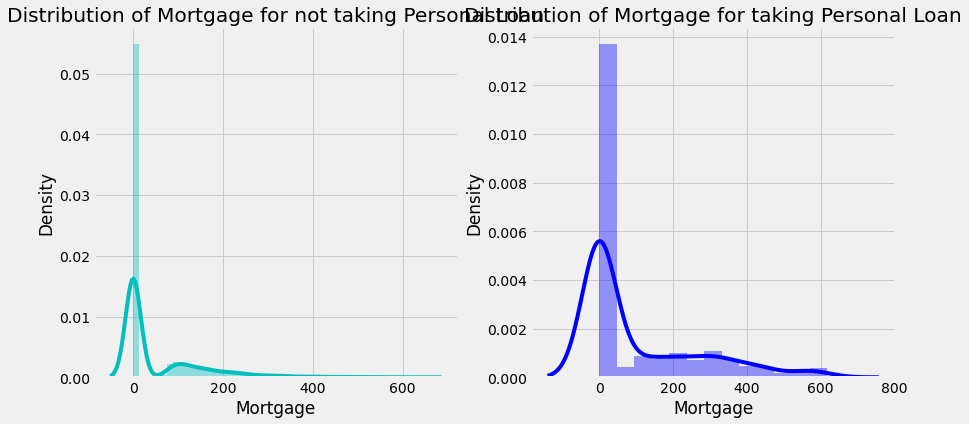

In [11]:
# Distribución de  Mortgage
fig = plt.figure(figsize = (12.8, 6))

ax = fig.add_subplot(121)
sns.distplot(bank[(bank['Personal Loan'] == 0)]['Mortgage'], color = 'c', 
             ax = ax).set_title('Distribution of Mortgage for not taking Personal Loan')

ax= fig.add_subplot(122)
sns.distplot(bank[(bank['Personal Loan'] == 1)]['Mortgage'], color = 'b', 
             ax = ax).set_title('Distribution of Mortgage for taking Personal Loan')

Text(0.5, 1.0, 'Distribution of CCAvg for taking Personal Loan')

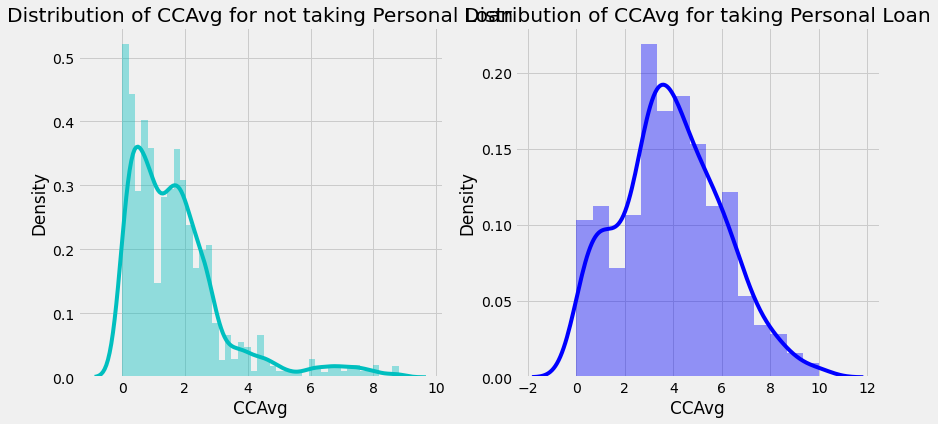

In [12]:
# Distribución of CCAvg
fig = plt.figure(figsize = (12.8, 6))

ax = fig.add_subplot(121)
sns.distplot(bank[(bank['Personal Loan'] == 0)]['CCAvg'], color = 'c', 
             ax = ax).set_title('Distribution of CCAvg for not taking Personal Loan')

ax= fig.add_subplot(122)
sns.distplot(bank[(bank['Personal Loan'] == 1)]['CCAvg'], color = 'b', 
             ax = ax).set_title('Distribution of CCAvg for taking Personal Loan')



In [13]:
# Distribución of Income
fig = plt.figure(figsize = (12.8, 6))

ax = fig.add_subplot(121)
sns.distplot(bank[(bank['Personal Loan'] == 0)]['Income'], color = 'c', 
             ax = ax).set_title('Distribution of Income for not taking Personal Loan')

ax= fig.add_subplot(122)
sns.distplot(bank[(bank['Personal Loan'] == 1)]['Income'], color = 'b', 
             ax = ax).set_title('Distribution of Income for taking Personal Loan'

SyntaxError: unexpected EOF while parsing (<ipython-input-13-02d2ca5ee7f4>, line 10)

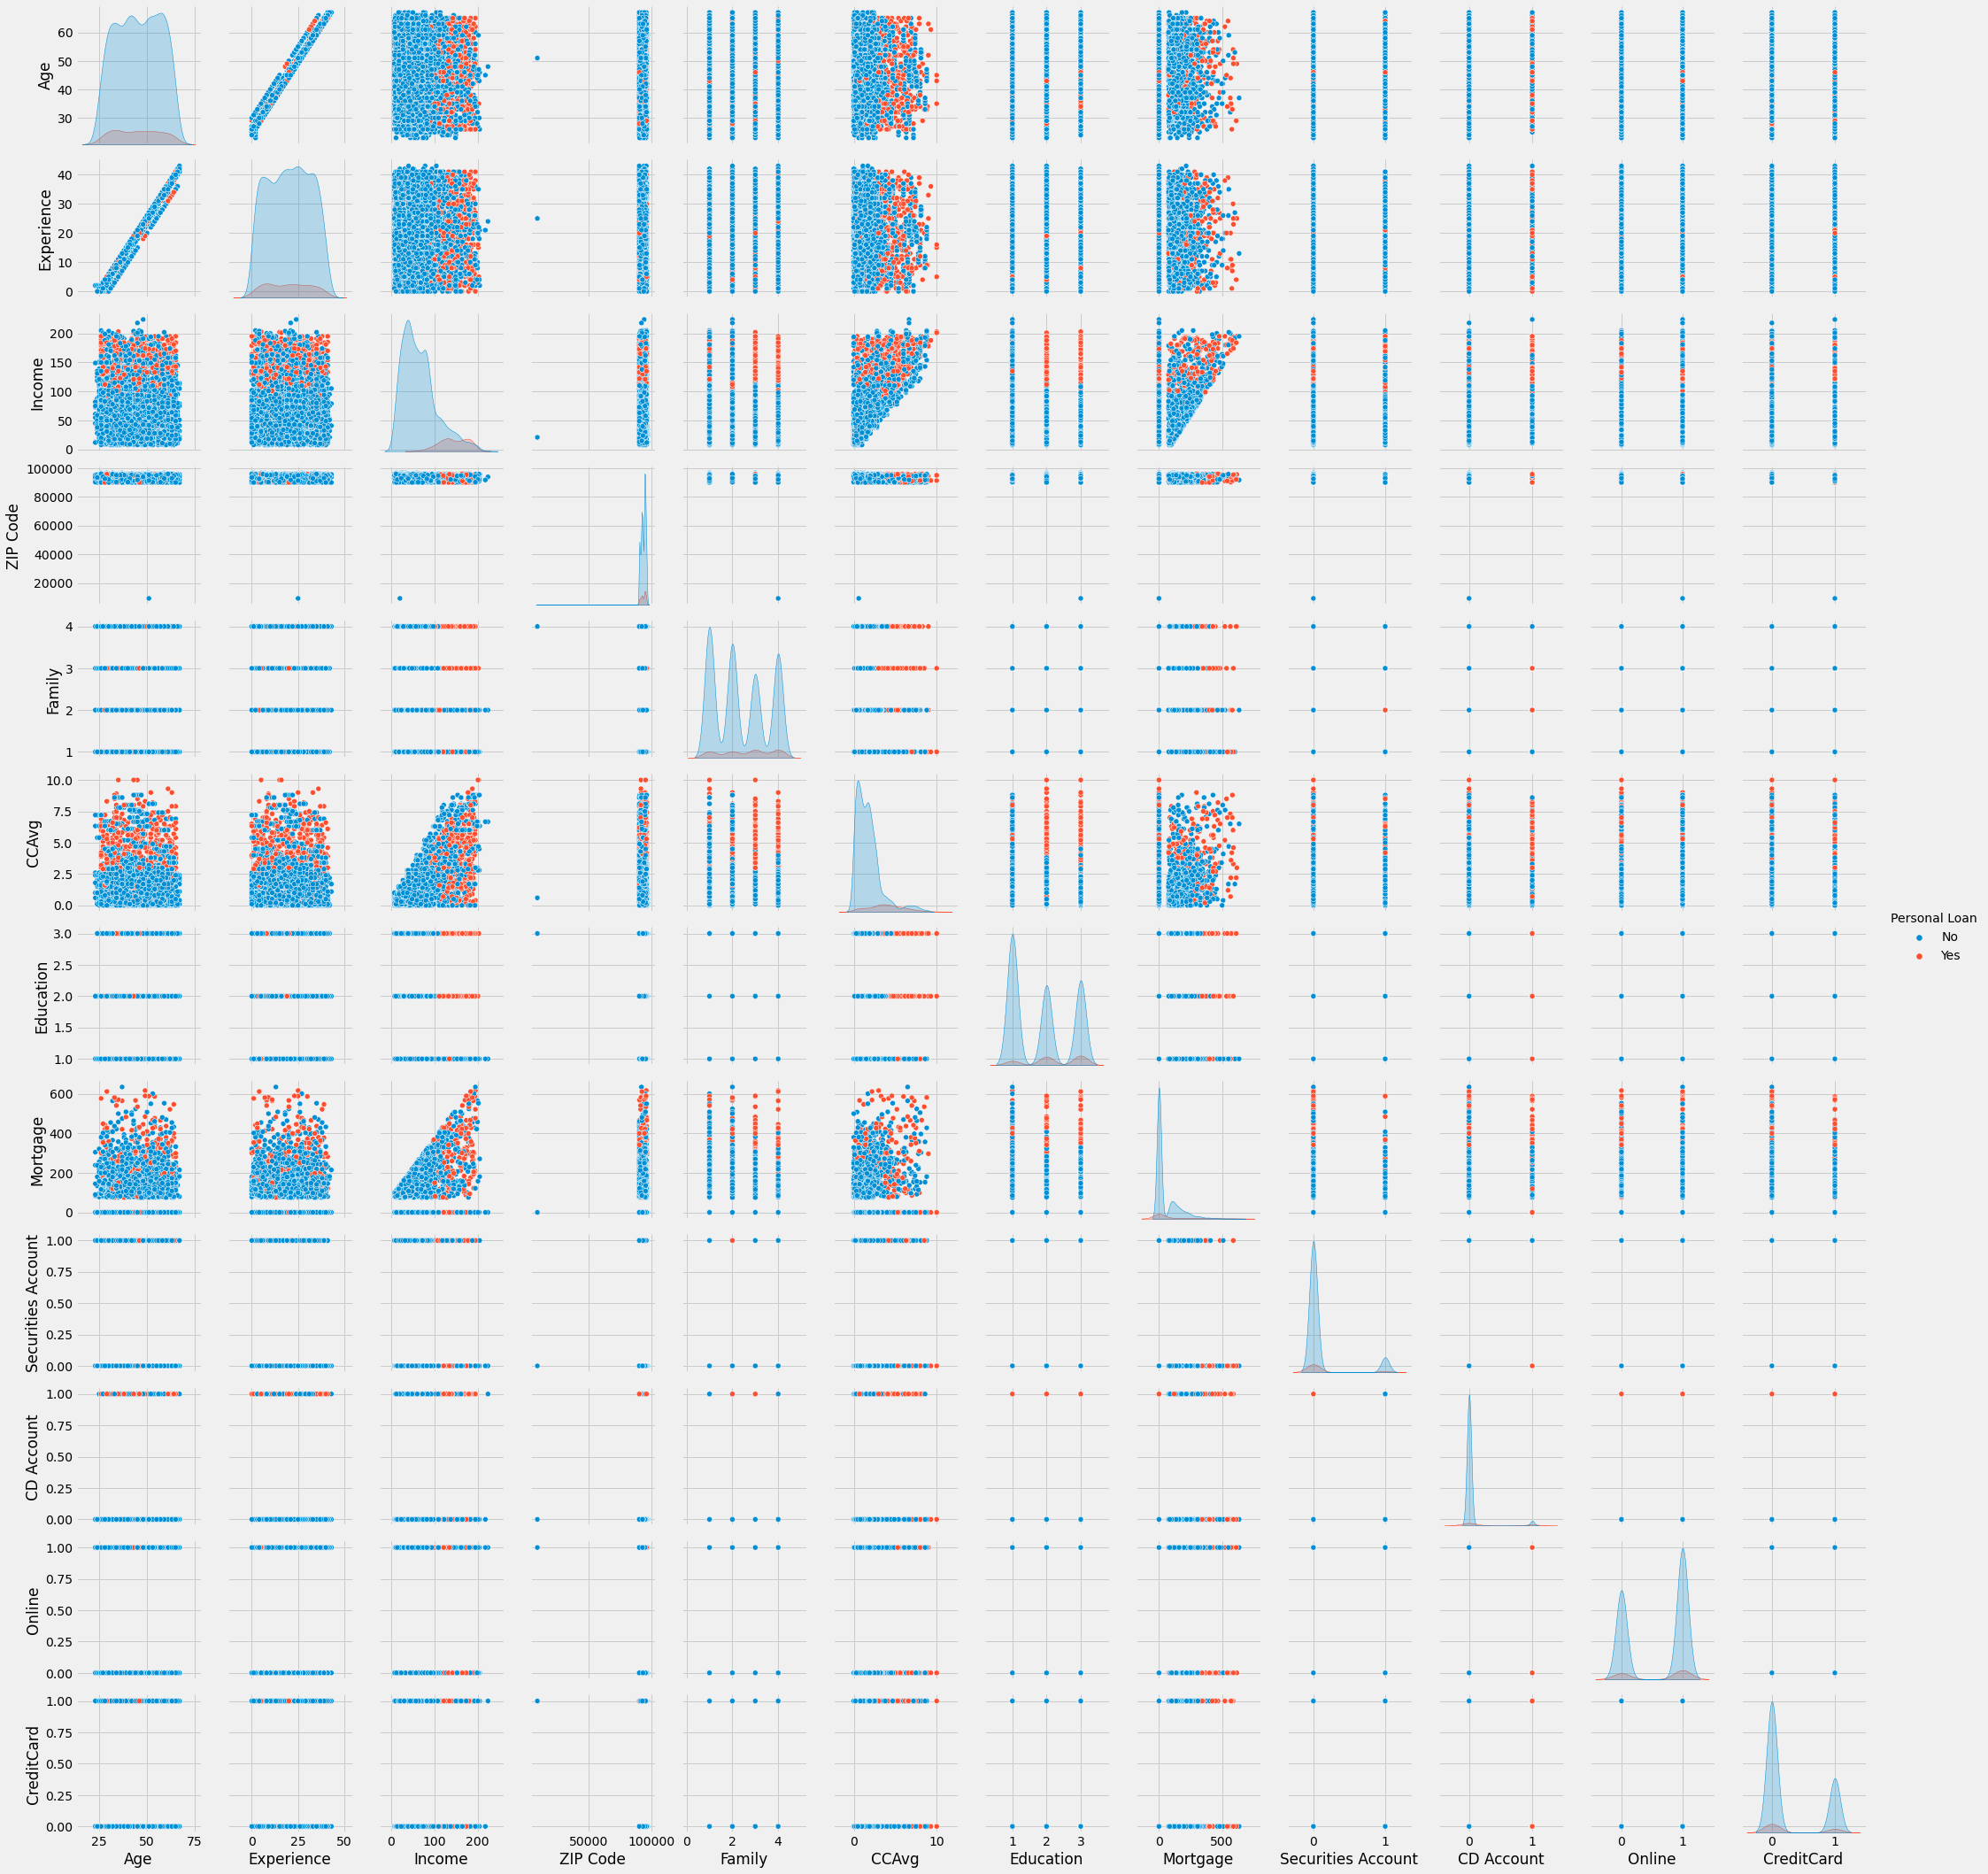

In [14]:
# Pairplot
pairplt = bank.drop('ID', axis = 1)
pairplt['Personal Loan'] = pairplt['Personal Loan'].replace({0: 'No', 1: 'Yes'})
sns.pairplot(pairplt, hue = 'Personal Loan')

**Observación** - de pairplt

+ La edad y la experiencia tienen una fuerte correlación positiva.
+ El código postal tiene un valor atípico que es inferior a 10K.
+ Las personas que toman el Préstamo personal que se les ofreció en una campaña anterior tienen una distribución de ingresos significativamente diferente a la de las personas que no toman el préstamo personal.
+ CCAvg, es decir, el gasto promedio en tarjetas difiere para las personas que toman el préstamo personal y las que no lo hacen.
+ El tamaño de la familia también es un factor importante para las personas que consideran tomar un préstamo personal del banco que se ofreció en una campaña anterior y también lo es Hipoteca, Cuenta de CD, Educación (hasta cierto punto) entre otras variables.


# Outliers

In [ ]:
# ZIP Code
display(bank[bank['ZIP Code'] < 10000])
plt.figure(figsize = (12.8 , 6))
sns.boxplot(bank['ZIP Code'], palette = 'copper').set_title('Outlier in Zip Code')

**Observación:** 
Dado que la mayoría del código postal tiene 5 dígitos (posiblemente en EE. UU.), El punto de datos anterior volvería a ser un error al observar y parecería lógico eliminar esta fila en particular del marco de datos.

In [15]:
# Eliminar index 384
bank.drop(384, axis = 0, inplace = True)

Text(0.5, 1.0, 'Distribution of Income by Personal Loan')

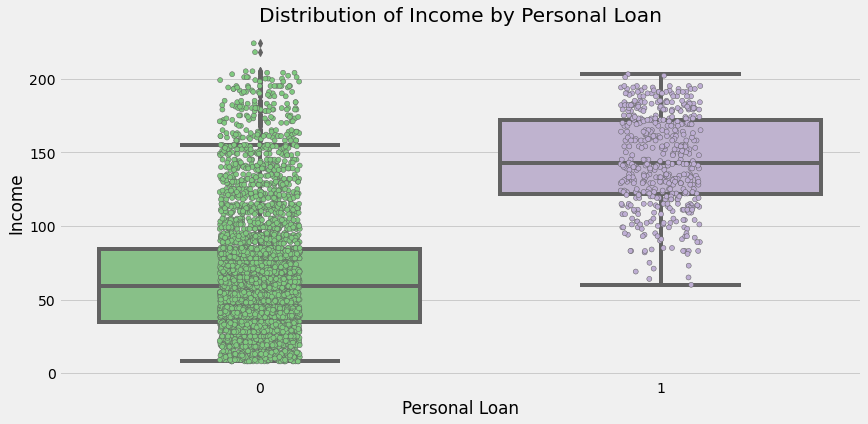

In [16]:
# Distribución de Income by Personal Loan
plt.figure(figsize = (12.8 , 6))
ax = sns.boxplot(x = 'Personal Loan', y = 'Income', palette = 'Accent', data = bank)
ax = sns.stripplot(x = 'Personal Loan', y = 'Income', palette = 'Accent', data = bank, 
              jitter = True, dodge = True, linewidth = 0.5)
ax.set_title('Distribution of Income by Personal Loan')

Text(0.5, 1.0, 'Distribution of Average Spending on Credit Card by Personal Loan')

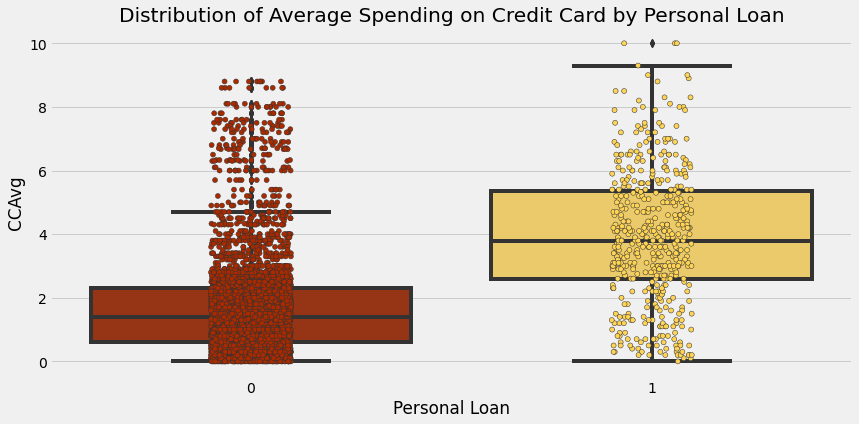

In [17]:
# Distribucion de Average Spending en Credit Card por Personal Loan
plt.figure(figsize = (12.8 , 6))
ax = sns.boxplot(x = 'Personal Loan', y = 'CCAvg', palette = 'afmhot', data = bank)
ax = sns.stripplot(x = 'Personal Loan', y = 'CCAvg', palette = 'afmhot', data = bank, 
              jitter = True, dodge = True, linewidth = 0.5)
ax.set_title('Distribution of Average Spending on Credit Card by Personal Loan')



<Figure size 921.6x432 with 0 Axes>

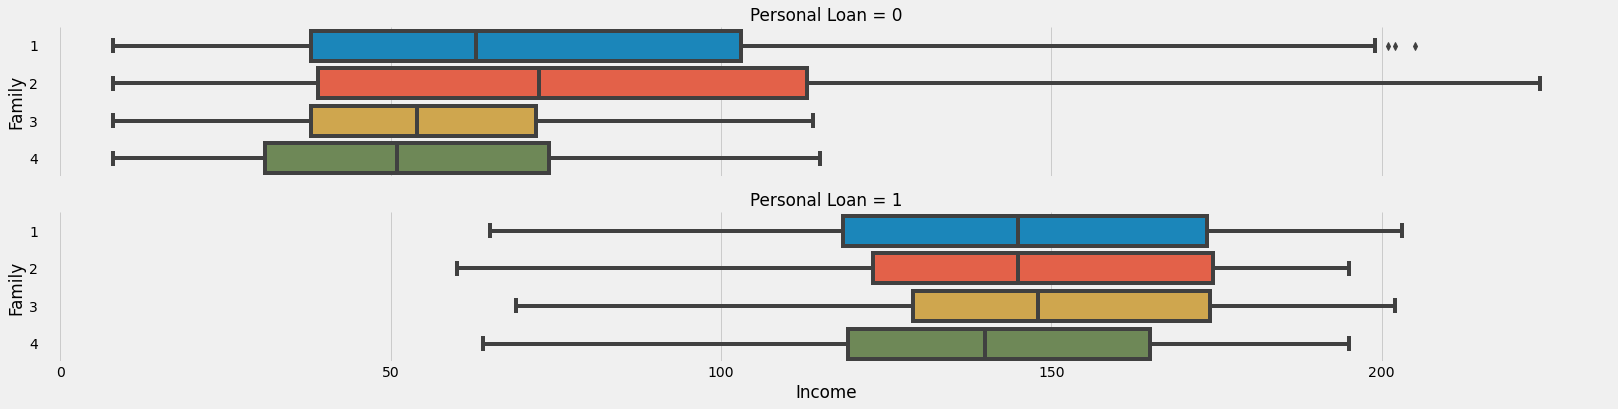

In [18]:
# Distribución de Family Size por Personal Loan y affect of Income
plt.figure(figsize = (12.8 , 6))
sns.catplot(x = 'Income', y = 'Family', row = 'Personal Loan', kind = 'box', orient = 'h', height = 2.8, aspect = 8, 
            data = bank)

<Figure size 921.6x432 with 0 Axes>

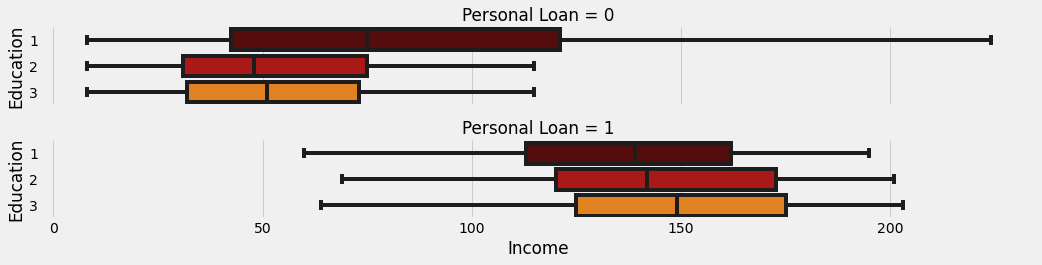

In [19]:
# Distribución of Education por Personal Loan y affect of Income
plt.figure(figsize = (12.8 , 6))
sns.catplot(x = 'Income', y = 'Education', row = 'Personal Loan', kind = 'box', orient = 'h', 
            height = 1.8, aspect = 8, palette = 'gist_heat', data = bank)

<AxesSubplot:xlabel='Education', ylabel='count'>

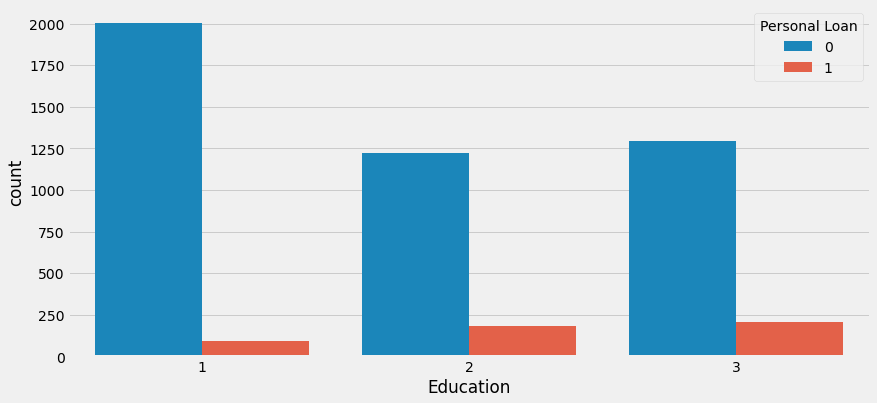

In [20]:
# Countplot de Education por Personal Loan
plt.figure(figsize = (12.8 , 6))
sns.countplot(x = 'Education', hue ='Personal Loan', data = bank)

<AxesSubplot:xlabel='CD Account', ylabel='count'>

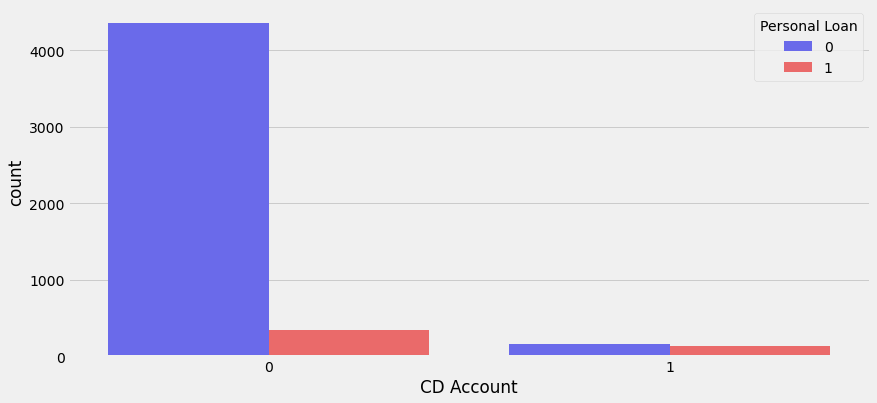

In [21]:
# Countplot de CD Account por Personal Loan
plt.figure(figsize = (12.8 , 6))
sns.countplot(x = 'CD Account', hue ='Personal Loan', palette = 'seismic', data = bank)



**Observación:** Income, CCAvg, Family (size), Mortgage, CD Account, Education and Personal Loan


+ Las personas con mayores ingresos en el conjunto de datos han tomado préstamos del banco en su última campaña.
+ A mayor ingreso, mayores son las posibilidades de que las personas obtengan préstamos del banco, independientemente del tamaño de su familia.
+ Las personas con un tamaño de familia de 2 son las personas con mayores ingresos en el conjunto de datos, sin embargo, eso no significa que sean las que toman la mayoría de los préstamos.
+ El gasto promedio en tarjetas de crédito por parte de personas que toman préstamos personales es más alto que aquellos que no toman préstamos personales.
+ Los clientes cuyo nivel educativo es 1 (licenciatura) tienen más ingresos.
+ Los clientes que han tomado el préstamo personal tienen los mismos niveles de ingresos.
+ El número de personas que toman préstamos personales aumenta con el aumento en el nivel de educación.
+ La mayoría de las personas que no tienen una cuenta de CD tampoco toman préstamos personales.
+ Para las personas con cuenta de CD, las probabilidades de tomar un préstamo personal son bastante similares a no tomar

In [22]:
# valores únicos de las variables categoricas
cat_cols = ['ZIP Code', 'Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
bank[cat_cols].nunique()



ZIP Code              466
Family                  4
Education               3
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [23]:
# Eliminar las variables 
bank.drop(['ID', 'ZIP Code'], axis = 1, inplace = True)
bank.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Matrix of Data')

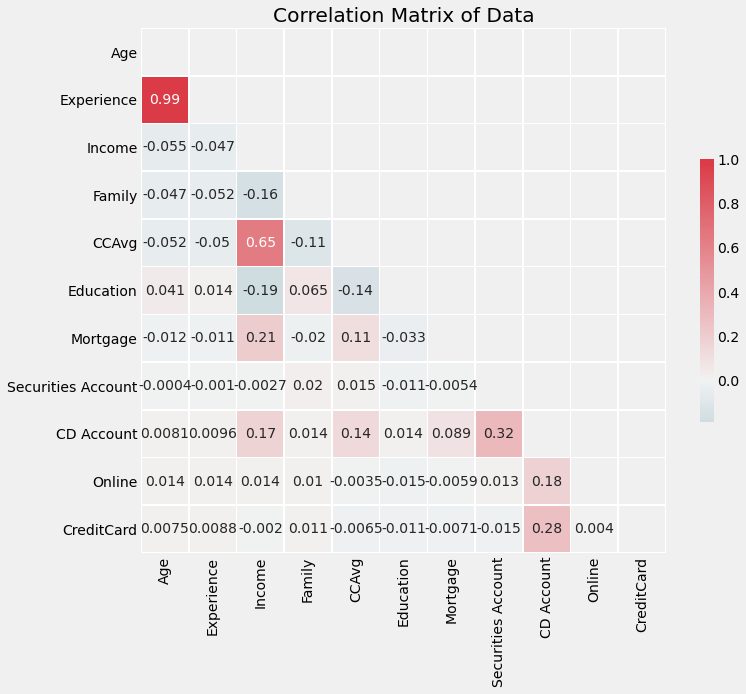

In [24]:
# Matriz de correlación
corr = bank.drop('Personal Loan', axis = 1).corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, center = 0, square = True, 
            linewidths = .5, cbar_kws = {"shrink": .5}, annot = True)
ax.set_title('Correlation Matrix of Data')

In [25]:
# Correlaciones mayores a 0.5
sort = corr.abs().unstack()
sort = sort.sort_values(kind = "quicksort", ascending = False)
sort[(sort > 0.5) & (sort < 1)]

Experience  Age           0.993922
Age         Experience    0.993922
CCAvg       Income        0.645931
Income      CCAvg         0.645931
dtype: float64

In [26]:
# Correlació absoluta de la variable independiente con 'Personal Loan' i.e. la variable objetivo
absCorrwithDep = []
allVars = bank.drop('Personal Loan', axis = 1).columns

for var in allVars:
    absCorrwithDep.append(abs(bank['Personal Loan'].corr(bank[var])))

display(pd.DataFrame([allVars, absCorrwithDep], index = ['Variable', 'Correlation']).T.\
        sort_values('Correlation', ascending = False))

,Variable,Correlation
2,Income,0.502459
4,CCAvg,0.366864
8,CD Account,0.316344
6,Mortgage,0.142065
5,Education,0.136834
3,Family,0.0614708
7,Securities Account,0.0219321
1,Experience,0.00844902
0,Age,0.00769369
9,Online,0.00633189


# Modelamiento
Utilice diferentes modelos de clasificación (Logistic, K-NN y Naïve Bayes) para predecir la probabilidad de que un cliente de responsabilidad compre préstamos personales

In [27]:
# dropping columnas
bank.drop(['Age', 'Online', 'CreditCard'], axis = 1, inplace = True)
bank.columns



Index(['Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account'],
      dtype='object')

# Regresión Logística

In [28]:
# Separar variables entre dependiente e independientes
X = bank.drop(['Personal Loan'], axis = 1)
y = bank['Personal Loan']
display(X.describe().T, X.shape, y.shape)

,count,mean,std,min,25%,50%,75%,max
Experience,4999.0,20.139428,11.406577,0.0,10.0,20.0,30.0,43.0
Income,4999.0,73.784757,46.032281,8.0,39.0,64.0,98.0,224.0
Family,4999.0,2.396079,1.147554,1.0,1.0,2.0,3.0,4.0
CCAvg,4999.0,1.938206,1.747731,0.0,0.7,1.5,2.5,10.0
Education,4999.0,1.880776,0.839804,1.0,1.0,2.0,3.0,3.0
Mortgage,4999.0,56.510102,101.720837,0.0,0.0,0.0,101.0,635.0
Securities Account,4999.0,0.104421,0.305836,0.0,0.0,0.0,0.0,1.0
CD Account,4999.0,0.060412,0.238273,0.0,0.0,0.0,0.0,1.0


(4999, 8)

(4999,)

In [29]:
# Split data en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



(3499, 8)

(1500, 8)

(3499,)

(1500,)

Scores de la Regresión Logistica 


LR accuracy para train set: 0.951
LR accuracy para test set: 0.943

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1354
           1       0.80      0.56      0.66       146

    accuracy                           0.94      1500
   macro avg       0.88      0.77      0.81      1500
weighted avg       0.94      0.94      0.94      1500


Matriz de confusión:
 [[1333   21]
 [  64   82]]

Accuracy Score:
 0.943


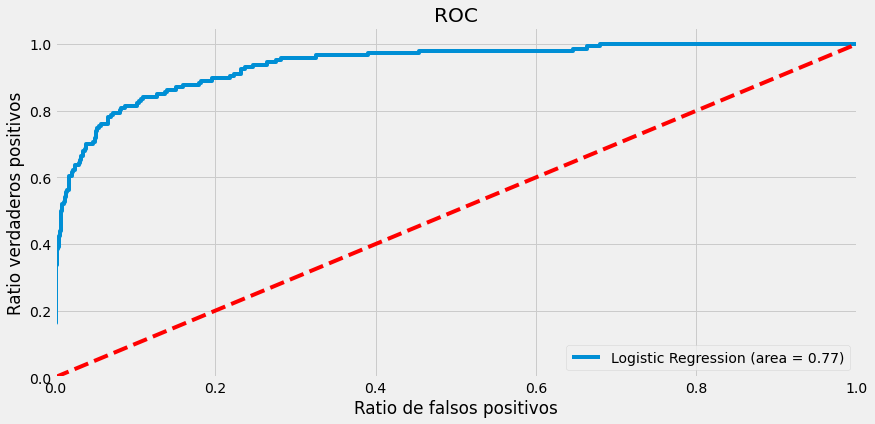

In [30]:
# LR
LR = LogisticRegression()
LR.fit(X_train, y_train)

print('Scores de la Regresión Logistica \n\n')
print('LR accuracy para train set: {0:.3f}'.format(LR.score(X_train, y_train)))
print('LR accuracy para test set: {0:.3f}'.format(LR.score(X_test, y_test)))

y_true, y_pred = y_test, LR.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nMatriz de confusión:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# ROC Curve
LR_roc_auc = roc_auc_score(y_true, LR.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, LR.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Logistic Regression (area = {})'.\
         format(LR_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ratio de falsos positivos')
plt.ylabel('Ratio verdaderos positivos')
plt.title('ROC')
plt.legend(loc = 'lower right')
plt.show()

## k-Nearest Neighbor Classifier

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3499, 8)

(1500, 8)

(3499,)

(1500,)

k-Nearest Neighbor Classifier Scores without feature scaling


k-NN accuracy for train set: 0.941
k-NN accuracy for test set: 0.907

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1354
           1       0.54      0.30      0.39       146

    accuracy                           0.91      1500
   macro avg       0.74      0.64      0.67      1500
weighted avg       0.89      0.91      0.90      1500


Confusion Matrix:
 [[1317   37]
 [ 102   44]]

Accuracy Score:
 0.907


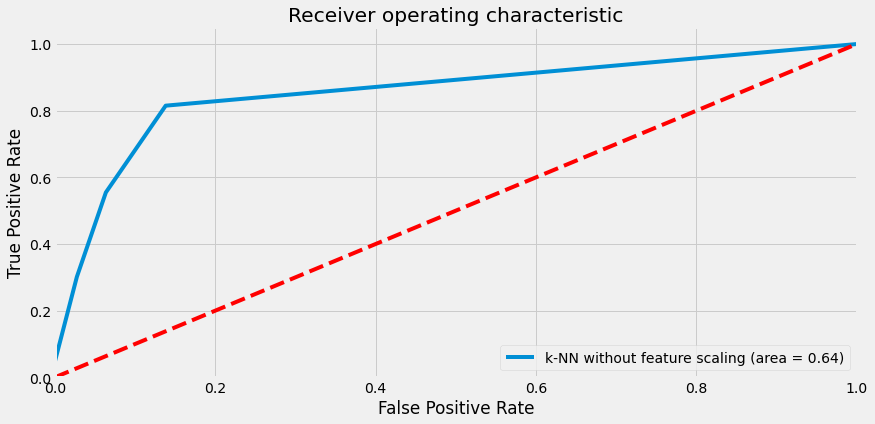

In [32]:
# KNN Model without scaling the features
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

print('k-Nearest Neighbor Classifier Scores without feature scaling\n\n')
print('k-NN accuracy for train set: {0:.3f}'.format(KNN.score(X_train, y_train)))
print('k-NN accuracy for test set: {0:.3f}'.format(KNN.score(X_test, y_test)))

y_true, y_pred = y_test, KNN.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# ROC Curve
KNN_roc_auc = roc_auc_score(y_true, KNN.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, KNN.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'k-NN without feature scaling (area = {})'.\
         format(KNN_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

In [33]:
# Scaling the independent variables
Xs = X.apply(zscore)
display(Xs.describe().T, Xs.shape, y.shape)

,count,mean,std,min,25%,50%,75%,max
Experience,4999.0,-1.763387e-16,1.0001,-1.765774,-0.889000,-0.012225,0.864550,2.004358
Income,4999.0,4.835433e-17,1.0001,-1.429243,-0.755736,-0.212584,0.526102,3.263585
Family,4999.0,-1.765608e-16,1.0001,-1.216692,-1.216692,-0.345185,0.526321,1.397827
CCAvg,4999.0,-4.415130e-17,1.0001,-1.109095,-0.708535,-0.250753,0.321474,4.613181
Education,4999.0,7.271639e-16,1.0001,-1.048893,-1.048893,0.141980,1.332854,1.332854
Mortgage,4999.0,-3.350435e-16,1.0001,-0.555597,-0.555597,-0.555597,0.437416,5.687603
Securities Account,4999.0,-4.289205e-16,1.0001,-0.341461,-0.341461,-0.341461,-0.341461,2.928588
CD Account,4999.0,3.573190e-16,1.0001,-0.253567,-0.253567,-0.253567,-0.253567,3.943727


(4999, 8)

(4999,)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size = 0.3, random_state = 42)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3499, 8)

(1500, 8)

(3499,)

(1500,)

k-Nearest Neighbor Classifier Scores after Scaling without Hyperparameter Tuning


k-NN accuracy for train set: 0.976
k-NN accuracy for test set: 0.961

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1354
           1       0.95      0.63      0.76       146

    accuracy                           0.96      1500
   macro avg       0.95      0.81      0.87      1500
weighted avg       0.96      0.96      0.96      1500


Confusion Matrix:
 [[1349    5]
 [  54   92]]

Accuracy Score:
 0.961


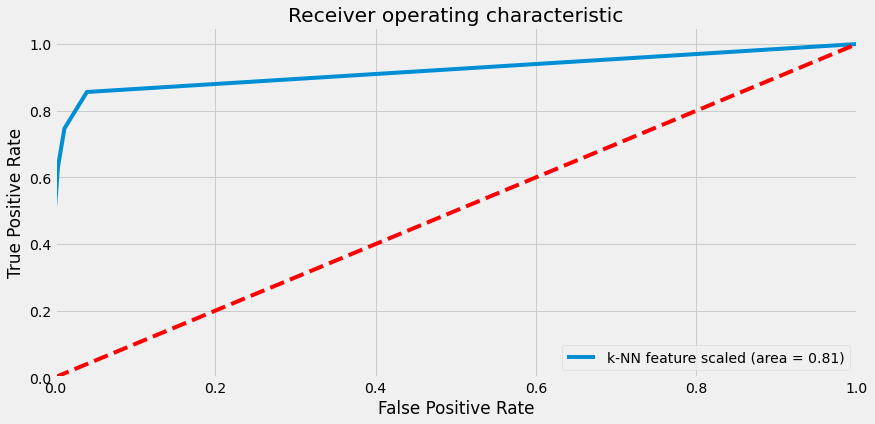

In [39]:
# KNN Model after scaling the features without hyperparameter tuning
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

print('k-Nearest Neighbor Classifier Scores after Scaling without Hyperparameter Tuning\n\n')
print('k-NN accuracy for train set: {0:.3f}'.format(KNN.score(X_train, y_train)))
print('k-NN accuracy for test set: {0:.3f}'.format(KNN.score(X_test, y_test)))

y_true, y_pred = y_test, KNN.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# ROC Curve
KNN_roc_auc = roc_auc_score(y_true, KNN.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, KNN.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'k-NN feature scaled (area = {})'.\
         format(KNN_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

(3499, 8)

(1500, 8)

(3499,)

(1500,)

k-Nearest Neighbor Classifier Scores after Hyperparameter Tuning


Best Hyper Parameters are:  {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}

Best Score is:  0.97
k-NN accuracy for train set: 1.000
k-NN accuracy for test set: 0.964

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1354
           1       0.97      0.65      0.78       146

    accuracy                           0.96      1500
   macro avg       0.97      0.82      0.88      1500
weighted avg       0.96      0.96      0.96      1500


Confusion Matrix:
 [[1351    3]
 [  51   95]]

Accuracy Score:
 0.964


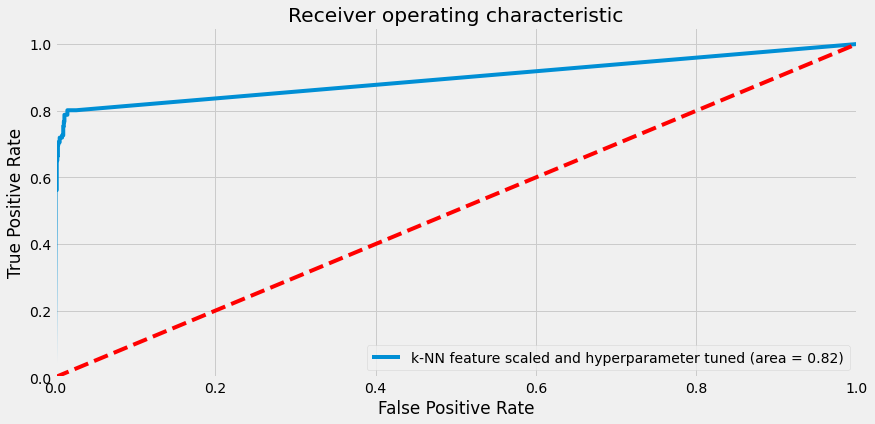

In [46]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size = 0.3, random_state = 42,shuffle=True)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# KNN with hyperparameter tuning
KNN = KNeighborsClassifier(n_jobs = -1)

params = {'n_neighbors': list(range(1, 40, 2)), 'weights': ['uniform', 'distance'],
          'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

skf = StratifiedKFold(n_splits = 10, random_state = 42,shuffle=True)
KNN_hyper = GridSearchCV(KNN, param_grid = params, n_jobs = -1, cv = skf)

KNN_hyper.fit(X_train, y_train)

print('k-Nearest Neighbor Classifier Scores after Hyperparameter Tuning\n\n')
print('Best Hyper Parameters are: ', KNN_hyper.best_params_)
print('\nBest Score is: ', KNN_hyper.best_score_.round(3))

print('k-NN accuracy for train set: {0:.3f}'.format(KNN_hyper.score(X_train, y_train)))
print('k-NN accuracy for test set: {0:.3f}'.format(KNN_hyper.score(X_test, y_test)))

y_true, y_pred = y_test, KNN_hyper.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# ROC Curve
KNN_hyper_roc_auc = roc_auc_score(y_true, KNN_hyper.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, KNN_hyper.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'k-NN feature scaled and hyperparameter tuned (area = {})'.\
         format(KNN_hyper_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

## Naive Bayes classifier

Naive Bayes Classifier Scores


NB accuracy for train set: 0.883
NB accuracy for test set: 0.893

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1354
           1       0.46      0.59      0.52       146

    accuracy                           0.89      1500
   macro avg       0.71      0.76      0.73      1500
weighted avg       0.91      0.89      0.90      1500


Confusion Matrix:
 [[1253  101]
 [  60   86]]

Accuracy Score:
 0.893


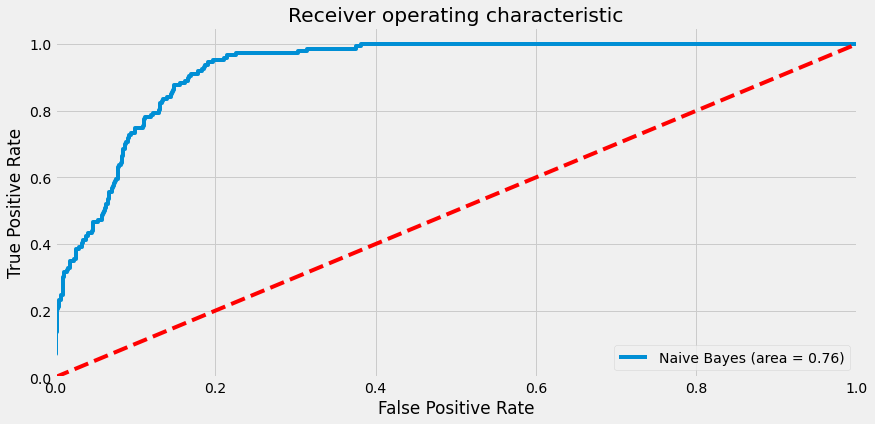

In [47]:
# Naive Bayes Model
NB = GaussianNB()
NB.fit(X_train, y_train)

print('Naive Bayes Classifier Scores\n\n')
print('NB accuracy for train set: {0:.3f}'.format(NB.score(X_train, y_train)))
print('NB accuracy for test set: {0:.3f}'.format(NB.score(X_test, y_test)))

y_true, y_pred = y_test, NB.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# ROC Curve
NB_roc_auc = roc_auc_score(y_true, NB.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, NB.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Naive Bayes (area = {})'.\
         format(NB_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

## Oversampling and k-NN

In [48]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size = 0.3, random_state = 42)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3499, 8)

(1500, 8)

(3499,)

(1500,)

In [51]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42, sampling_strategy='minority')
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# antes del oversampling
unique, counts = np.unique(y_train, return_counts = True)
print(np.asarray((unique, counts)).T)

# después de oversampling
unique, counts = np.unique(y_train_res, return_counts = True)
print(np.asarray((unique, counts)).T)


[[   0 3165]
 [   1  334]]
[[   0 3165]
 [   1 3165]]


k-Nearest Neighbor Classifier Scores With Oversampling (SMOTE) and Hyperparameter Tuning


Best Hyper Parameters are:  {'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}

Best Score is:  0.993
k-NN accuracy for train set: 1.000
k-NN accuracy for test set: 0.970

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1354
           1       0.93      0.75      0.83       146

    accuracy                           0.97      1500
   macro avg       0.95      0.87      0.91      1500
weighted avg       0.97      0.97      0.97      1500


Confusion Matrix:
 [[1346    8]
 [  37  109]]

Accuracy Score:
 0.97


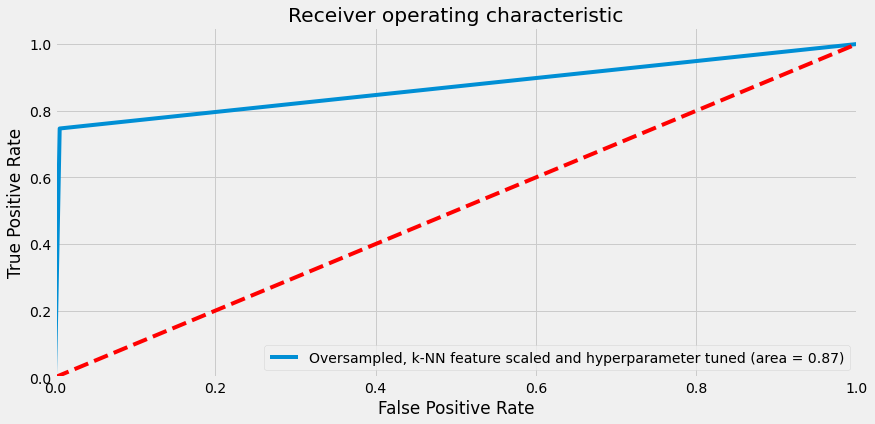

In [53]:
# KNN with hyperparameter tuning and Oversampling
KNN = KNeighborsClassifier(n_jobs = -1)

params = {'n_neighbors': list(range(1, 40, 2)), 'weights': ['uniform', 'distance'],
          'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

skf = StratifiedKFold(n_splits = 10, random_state = 42,shuffle=True)
KNN_hyper = GridSearchCV(KNN, param_grid = params, n_jobs = -1, cv = skf)

KNN_hyper.fit(X_train_res, y_train_res)

print('k-Nearest Neighbor Classifier Scores With Oversampling (SMOTE) and Hyperparameter Tuning\n\n')
print('Best Hyper Parameters are: ', KNN_hyper.best_params_)
print('\nBest Score is: ', KNN_hyper.best_score_.round(3))

print('k-NN accuracy for train set: {0:.3f}'.format(KNN_hyper.score(X_train_res, y_train_res)))
print('k-NN accuracy for test set: {0:.3f}'.format(KNN_hyper.score(X_test, y_test)))

y_true, y_pred = y_test, KNN_hyper.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# ROC Curve
KNN_hyper_roc_auc = roc_auc_score(y_true, KNN_hyper.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, KNN_hyper.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Oversampled, k-NN feature scaled and hyperparameter tuned (area = {})'.\
         format(KNN_hyper_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

# Conclusión y comprensión de los resultados de los modelos
Una campaña que el banco realizó el año pasado para clientes de responsabilidad mostró una tasa de conversión saludable de más del 9% de éxito.

La mayoría de los modelos ML funcionan mejor cuando el número de clases está en la misma proporción, ya que están diseñados para maximizar la precisión y reducir el error. Por lo tanto, no tienen en cuenta la distribución / proporción de clases o el equilibrio de clases. En nuestro conjunto de datos, el porcentaje de clientes que aceptaron el préstamo bancario ofrecido en la campaña (clase 1) es del 9,6%, mientras que el 90,4% de los clientes no aceptaron el préstamo ofrecido (clase 0).

La matriz de confusión es otra métrica que se utiliza a menudo para medir el rendimiento de un algoritmo de clasificación, que contiene información sobre la clase real y la predicha.

Métricas que se pueden calcular a partir de la matriz de confusión:

* Precisión: cuando predice el resultado positivo, ¿con qué frecuencia es correcto? es decir, limitar el número de falsos positivos.
*Recall: cuando en realidad es un resultado positivo, ¿con qué frecuencia se predice correctamente? es decir, limitar el número de falsos negativos.
*f1-Score: Media armónica de precisión y recuperación.
La matriz de confusión para la clase 1 (aceptada) se vería así: 
|                          | Predicted: 0 (Not Accepted) | Predicted: 1 (Accepted) |   |   |
|:------------------------:|:---------------------------:|:-----------------------:|---|---|
| Actual: 0 (Not Accepted) |        True Negatives       |     False Positives     |   |   |
|   Actual: 1 (Accepted)   |       False Negatives       |      True Positives     |   |   |
|                          |                             |                         |   |   |

La precisión nos indicaría los casos en los que el cliente no aceptó el préstamo personal, pero nosotros lo pronosticamos como aceptado.
Recall nos diría casos en los que el cliente realmente aceptó el personal, pero nosotros lo predijimos como no aceptado.
En nuestro caso, el recall tendría más importancia que la precisión. Por lo tanto, se elege el recall y la puntuación f1, que es la media armónica de la precisión y el recuerdo, como métrica de evaluación, en particular para la clase 1.

Además, la curva AUC-ROC es una medida de rendimiento para problemas de clasificación en varios ajustes de umbrales. ROC es una curva de probabilidad y AUC representa el grado o medida de separabilidad. Indica cuánto modelo es capaz de distinguir entre clases. Cuanto mayor sea el AUC, mejor es el modelo para predecir 0 como 0 y 1 como 1. Por analogía, cuanto mayor sea el AUC, mejor es el modelo para distinguir entre las personas que aceptan el préstamo y las personas que no aceptan el préstamo ofrecido por la fuente bancaria.

Por lo tanto, según nuestra métrica de evaluación, las puntuaciones de los modelos que probamos son las siguientes: 

|                               Models                              | Recall Score for Class 1 (%) | f1-score for Class 1 (%) | ROC AUC (%) | Accuracy (%) |
|:-----------------------------------------------------------------:|:----------------------------:|:------------------------:|:-----------:|:------------:|
|                        Logistic Regression                        |              53              |            64            |      76     |     94.2     |
|           Logistic Regression with Hyperparameter Tuning          |              55              |            64            |      77     |      94      |
|             k-Nearest Neighbor without Feature Scaling            |              30              |            39            |      64     |     90.7     |
|              k-Nearest Neighbor with Feature Scaling              |              63              |            76            |      81     |     96.1     |
| k-Nearest Neighbor with Feature Scaling and Hyperparameter Tuning |              66              |            79            |      83     |     96.5     |
|                            Naive Bayes                            |              59              |            52            |      76     |     89.3     |

Algunas de las ventajas o la razón por la que k-NN se desempeñó mejor:

Algoritmo no paramétrico, lo que significa que no se deben cumplir suposiciones para implementar k-NN. Los modelos paramétricos como la regresión logística tienen muchos supuestos que deben cumplir los datos antes de que se puedan implementar, lo que no es el caso de k-NN.
k-NN es un enfoque basado en memoria que es el clasificador que se adapta inmediatamente a medida que recopilamos nuevos datos de entrenamiento. Permite que el algoritmo responda rápidamente a los cambios en la entrada durante el uso en tiempo real.
k-NN funciona bien con una pequeña cantidad de variables de entrada que en nuestro caso, después de descartar irrelevantes, fueron 8.
Además, también probamos el sobremuestreo, que es una de las formas comunes de abordar el problema de los datos desequilibrados. El sobremuestreo se refiere a varios métodos que tienen como objetivo aumentar el número de instancias de la clase subrepresentada en el conjunto de datos. De los diversos métodos, elegimos la Técnica de sobremuestreo de minorías sintéticas (SMOTE). La principal ventaja de SMOTE en comparación con el sobremuestreo ingenuo aleatorio tradicional es que al crear observaciones sintéticas en lugar de reutilizar las observaciones existentes, es menos probable que el clasificador se sobreajuste.

Resultados del sobremuestreo (SMOTE) junto con el modelo de mejor rendimiento del lote anterior, es decir, k-NN función escalada y ajuste de hiperparámetros:

Recall (clase 1): 75% (una mejora del 9%)
f1-score (clase 1): 83% (una mejora del 4%)
Puntaje ROC AUC: 87% (una mejora del 4%)
Puntuación de precisión: 97% (una mejora del 0,5%)